# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# Dr. Ryan @STEMplicity



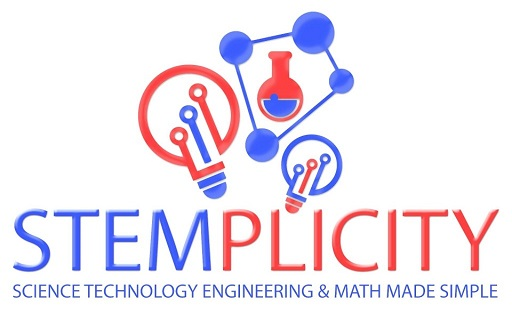

# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
training_data=pd.read_csv('Bank_Customer_retirement.csv')
training_data

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [11]:
training_data.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [12]:
training_data.shape

(500, 4)

In [13]:
training_data.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [14]:
training_data.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

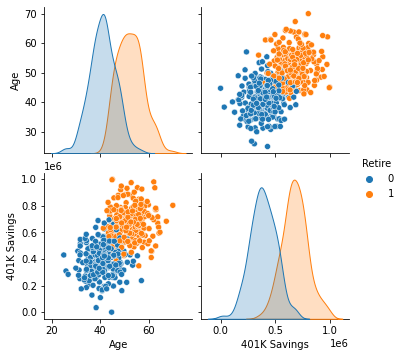

In [17]:
sns.pairplot(training_data,hue='Retire',vars=['Age','401K Savings'])

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retire', ylabel='count'>

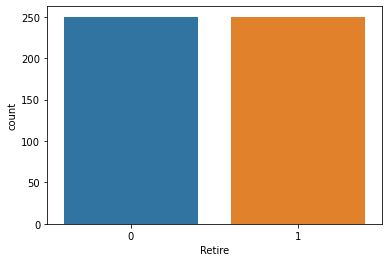

In [19]:
sns.countplot(training_data['Retire'],label='count')

# STEP #4: MODEL TRAINING 

In [23]:
training_data.drop(['Customer ID'],inplace=True,axis=1)

KeyError: "['Customer ID'] not found in axis"

In [26]:

# Let's drop the target label coloumns
X=training_data.drop(['Retire'],axis=1)
y=training_data['Retire']

In [28]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [29]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [100]:
X_train.shape

(400, 2)

In [102]:
X_test.shape

(100, 2)

In [103]:
y_train.shape

(400,)

In [104]:
y_test.shape

(100,)

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

In [106]:
y_predict=svc_model.predict(X_test)

<AxesSubplot:>

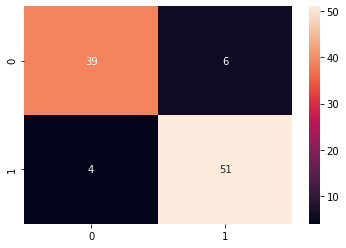

In [109]:
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True)

In [110]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        45
           1       0.89      0.93      0.91        55

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# STEP #6: IMPROVING THE MODEL

In [112]:
min_train=X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [113]:
range_train=(X_train-min_train).max()
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [114]:
X_train_scaled=(X_train-min_train)/range_train

In [115]:
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


In [116]:
y_train

247    1
390    1
186    1
484    1
139    0
      ..
486    0
189    0
495    1
206    1
355    0
Name: Retire, Length: 400, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

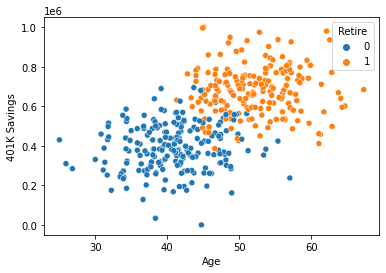

In [117]:
sns.scatterplot(x=X_train['Age'],y=X_train['401K Savings'],hue=y_train)

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

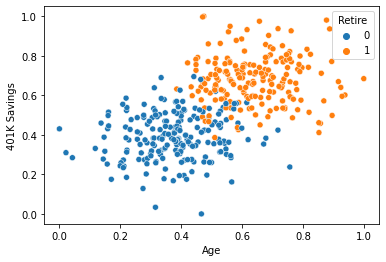

In [118]:
sns.scatterplot(x=X_train_scaled['Age'],y=X_train_scaled['401K Savings'],hue=y_train)

In [119]:
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test
X_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
...,...,...
145,0.633436,0.635622
234,0.612141,0.525418
382,0.444550,0.850610
141,0.538401,0.412874


<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

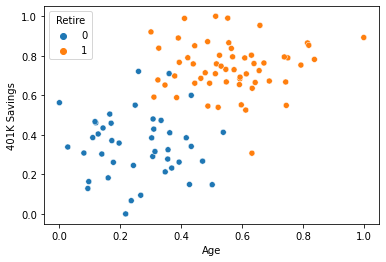

In [120]:
sns.scatterplot(x=X_test_scaled['Age'],y=X_test_scaled['401K Savings'],hue=y_test)

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

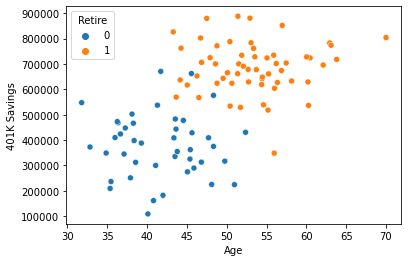

In [121]:
sns.scatterplot(x=X_test['Age'],y=X_test['401K Savings'],hue=y_test)

In [122]:
svc_model.fit(X_train_scaled,y_train)
y_predict=svc_model.predict(X_test_scaled)

<AxesSubplot:>

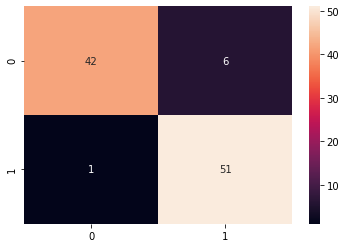

In [123]:
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True)

In [124]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.89      0.98      0.94        52

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



# IMPROVING THE MODEL - PART 2

In [125]:
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid=GridSearchCV(SVC(), param_grid, refit=True,verbose=4)

In [129]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=4)

In [133]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [131]:
grid_predict=grid.predict(X_test_scaled)

In [132]:
cm=confusion_matrix(y_test,grid_predict)

<AxesSubplot:>

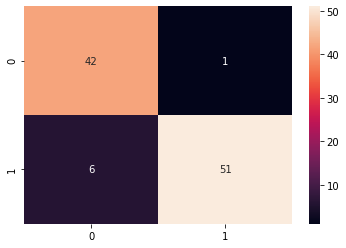

In [134]:
sns.heatmap(cm,annot=True)

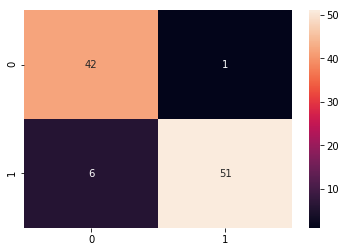

In [135]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!